Importamos librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import spearmanr


Cargamos CSVs

In [2]:
demo = pd.read_csv('df_final_demo.txt')
demo.to_csv('df_final_demo.txt', index=False)

In [3]:
experiment = pd.read_csv('df_final_experiment_clients.txt')
experiment.to_csv('df_final_experiment_clients.txt', index=False)

In [4]:
web1 = pd.read_csv('df_final_web_data_pt_1.txt')
web1.to_csv('df_final_web_data_pt_1.txt', index=False)

In [5]:
web2 = pd.read_csv('df_final_web_data_pt_2.txt')
web2.to_csv('df_final_web_data_pt_2.txt', index=False)

Juntamos las dos webs con concat

In [66]:
web = pd.concat([web1,web2],axis=0)
web.to_csv("webb.csv")

Eliminamos duplicados de demo y reseteamos el index
Filtamos por max de 42 años en la empresa ya que los datos son de 2017 y Vanguard es de 1975

In [7]:
demo.dropna(inplace=True)
demo_42 = demo['clnt_tenure_yr'].quantile(0.999)
demo = demo[demo['clnt_tenure_yr'] <= demo_42]
demo.reset_index(drop=True, inplace=True)

Eliminamos duplicados de web y reseteamos el index

In [8]:
web.drop_duplicates(inplace=True)
web.reset_index(drop=True, inplace=True)

Eliminamos duplicados de experiment y reseteamos el index

In [9]:
experiment.dropna(inplace=True)
experiment.reset_index(drop=True, inplace=True)

Eliminamos columna visitor_id ya que no nos sirve

In [10]:
web.drop("visitor_id", axis=1, inplace=True)

Cambiamos de float a int las columnas de demo

In [11]:
demo['clnt_age'] = demo['clnt_age'].astype(int)
demo['clnt_tenure_yr'] = demo['clnt_tenure_yr'].astype(int)
demo['clnt_tenure_mnth'] = demo['clnt_tenure_mnth'].astype(int)
demo['num_accts'] = demo['num_accts'].astype(int)
demo['calls_6_mnth'] = demo['calls_6_mnth'].astype(int)
demo['logons_6_mnth'] = demo['logons_6_mnth'].astype(int)

Juntamos demo y web con merge

In [12]:
mergeado = pd.merge(web, demo, on ='client_id', how='inner')
mergeado

,client_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79,U,2,189023.86,1,4
1,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79,U,2,189023.86,1,4
2,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79,U,2,189023.86,1,4
3,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5,64,79,U,2,189023.86,1,4
4,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5,64,79,U,2,189023.86,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
443348,9895983,498981662_93503779869_272484,step_3,2017-06-15 19:52:09,10,121,49,M,2,97748.22,2,2
443349,9895983,498981662_93503779869_272484,step_2,2017-06-15 19:50:37,10,121,49,M,2,97748.22,2,2
443350,9895983,498981662_93503779869_272484,step_1,2017-06-15 19:50:05,10,121,49,M,2,97748.22,2,2
443351,9895983,498981662_93503779869_272484,start,2017-06-15 19:50:00,10,121,49,M,2,97748.22,2,2


Juntamos web y experiment con merge

In [13]:
df_merged = web.merge(experiment, on="client_id", how="inner")
df_merged

,client_id,visit_id,process_step,date_time,Variation
0,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,Test
1,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,Test
2,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,Test
3,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,Test
4,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,Test
...,...,...,...,...,...
317230,1574008,528720790_71583064618_169151,start,2017-05-06 23:43:27,Test
317231,2908510,562606085_36368381773_92090,start,2017-05-10 22:57:17,Control
317232,2908510,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,Control
317233,2908510,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,Control


In [14]:
mergeado_final = pd.merge(mergeado,experiment, on="client_id", how="inner")
mergeado_final

,client_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79,U,2,189023.86,1,4,Test
1,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79,U,2,189023.86,1,4,Test
2,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79,U,2,189023.86,1,4,Test
3,9988021,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5,64,79,U,2,189023.86,1,4,Test
4,9988021,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5,64,79,U,2,189023.86,1,4,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316848,1574008,528720790_71583064618_169151,start,2017-05-06 23:43:27,10,121,55,U,2,153238.83,3,6,Test
316849,2908510,562606085_36368381773_92090,start,2017-05-10 22:57:17,21,252,34,M,3,141808.05,6,9,Control
316850,2908510,562606085_36368381773_92090,step_2,2017-05-10 22:56:31,21,252,34,M,3,141808.05,6,9,Control
316851,2908510,562606085_36368381773_92090,step_1,2017-05-10 22:56:23,21,252,34,M,3,141808.05,6,9,Control


Creamos este df para su posterior uso cuando saquemos el tiempo entre pasos

In [15]:
df_reducido = mergeado_final.copy()

In [16]:
df_reducido.to_csv("df_errores.csv",index=False)

In [17]:
df_reducido['date_time'] = pd.to_datetime(df_reducido['date_time'])

In [18]:
df_reducido['process_step'] = df_reducido['process_step'].replace({
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}).astype(int)

C:\Users\34722\AppData\Local\Temp\ipykernel_11388\3933595922.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reducido['process_step'] = df_reducido['process_step'].replace({


Aqui vemos las veces que los clientes ha entrado en la web de experimento

In [19]:
df_merged.groupby("client_id")["visit_id"].value_counts().sort_values(ascending=False)

client_id  visit_id                    
2313292    712824876_8175482950_365042     61
7795550    428529357_6959155752_124163     42
2138772    428919026_83099642366_340343    36
5582954    834703874_81652602361_748606    35
6686840    699879519_24719899358_572278    34
                                           ..
2222918    515291425_40012870236_243356     1
7181877    155202309_26285837012_822535     1
1554187    683415286_78995321682_75543      1
3103730    366310645_26042650473_387647     1
4429179    152095888_80543296567_213982     1
Name: count, Length: 69447, dtype: int64

 Creamos un nuevo dataset filtrando demo en los clientes que tengan mas de 300k en la cuenta para ver nuestros clientes importantes

In [20]:
demo_importantes = demo[demo["bal"] >= 300000]

Creamos un CSV con los clientes importantes

In [21]:
demo_importantes.to_csv("importantes.csv", index=False)

Tabla de clientes importantes por genero y por numero de cuentas

In [22]:
crosstabF = pd.crosstab(demo_importantes['gendr'], demo_importantes['num_accts'])
crosstabF

num_accts,2,3,4,5,6,7
gendr,,,,,,
F,1123,704,244,43,7,2
M,1929,1530,553,102,20,3
U,871,338,112,22,1,0


Creamos una copia de demo para tocar los datos y sacar info sin modificar e original

In [23]:
demo_copia = demo.copy()
demo_copia_imp = demo_importantes.copy()

Cambiamos la columna clnt_age en rangos de 15 años para todos los clientes y para los importantes

In [24]:
bins = [0, 25, 40, 55, 70, demo_copia['clnt_age'].max()]
labels = ['>25','25-40','40-55','55-70','<70']
demo_copia['clnt_age'] = pd.cut(demo_copia['clnt_age'], bins=bins, labels=labels, include_lowest=True)

In [25]:
demo_copia.to_csv("importantes2.csv", index=False)

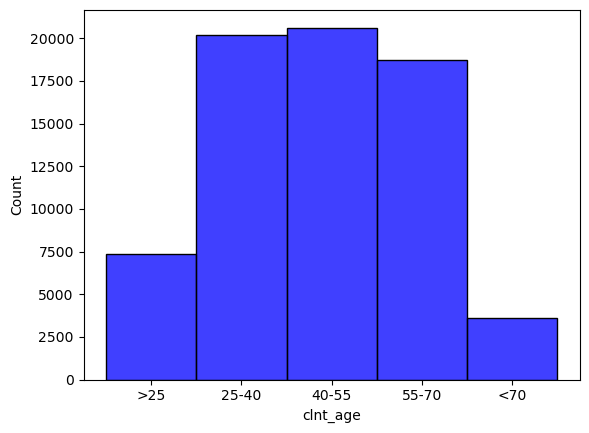

In [26]:
sns.histplot(demo_copia['clnt_age'], bins=30, color="blue")
plt.show()

In [27]:
bins = [0, 25, 40, 55, 70, demo_copia_imp['clnt_age'].max()]
labels = ['>25','25-40','40-55','55-70','<70']
demo_copia_imp['clnt_age'] = pd.cut(demo_copia_imp['clnt_age'], bins=bins, labels=labels, include_lowest=True)

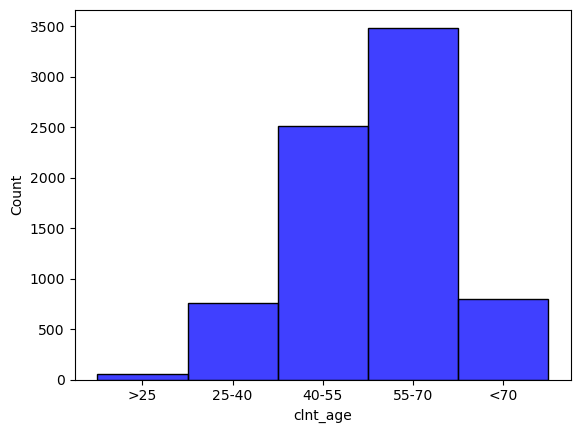

In [28]:
sns.histplot(demo_copia_imp['clnt_age'], bins=30, color="blue")
plt.show()

Agrupamos en grupos de 300k, 400k, 500k, 1M y +1,5M los clientes importantes

In [29]:
bins = [300000, 400000, 500000, 750000, 1000000, 1500000, demo_copia_imp['bal'].max()]
labels = ['+300k', "+400k", '+500k', '+750k', "+1M", "+1.5M"]
demo_copia_imp['bal'] = pd.cut(demo_copia_imp['bal'], bins=bins, labels=labels, include_lowest=True)

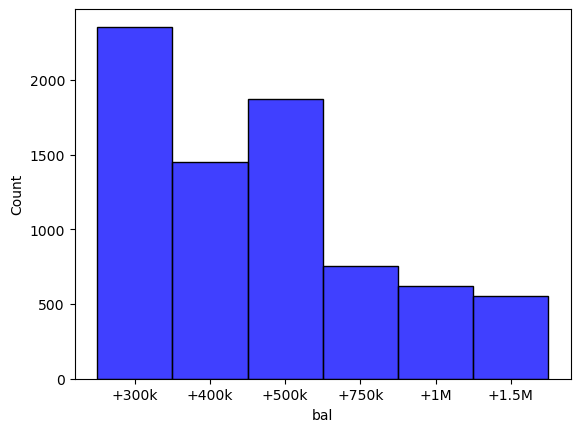

In [30]:
sns.histplot(demo_copia_imp['bal'], bins=30, color="blue")
plt.show()

Sacamos una garfica para ver la distribución de edad de los clientes importantes

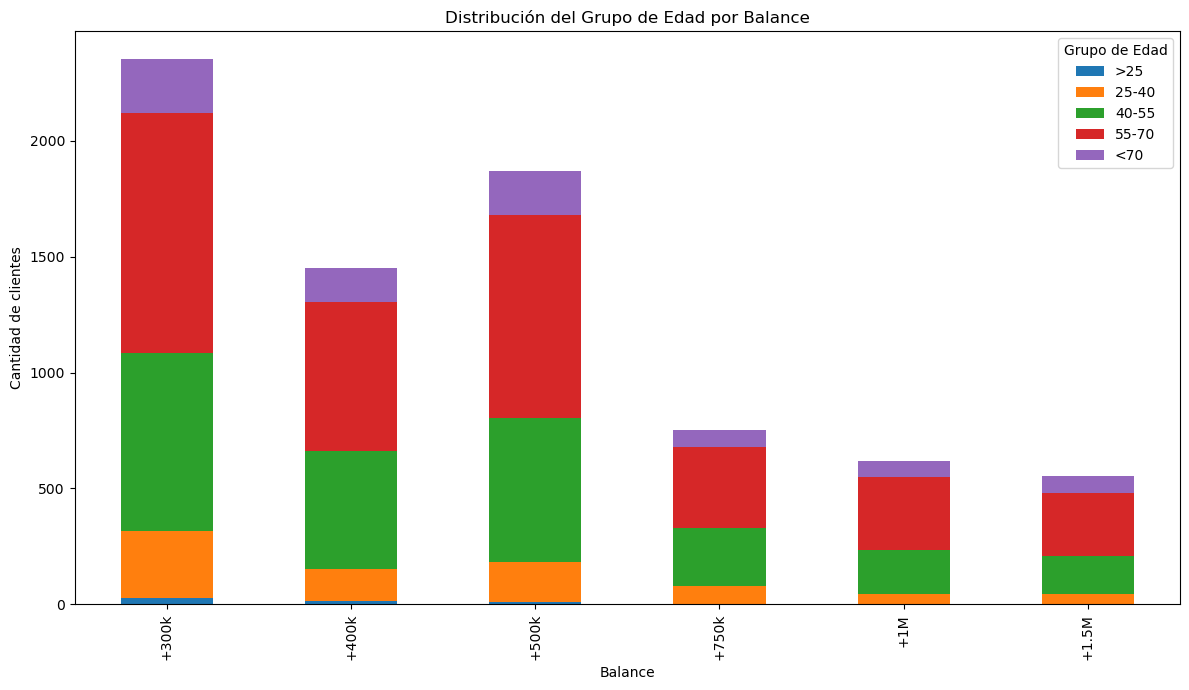

In [31]:
tabla = pd.crosstab(demo_copia_imp['bal'], demo_copia_imp['clnt_age'])

# Gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(12,7))
plt.xlabel('Balance')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución del Grupo de Edad por Balance')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()

Tabla de distribución de edad de los clientes importantes

In [32]:
crosstab = pd.crosstab(demo_copia_imp['clnt_age'], demo_copia_imp['bal'])
crosstab

bal,+300k,+400k,+500k,+750k,+1M,+1.5M
clnt_age,,,,,,
>25,25,14,10,3,1,1
25-40,289,139,173,75,42,41
40-55,769,510,621,253,189,166
55-70,1036,642,876,346,315,272
<70,236,148,191,76,70,75


Grafica edad de los clientes

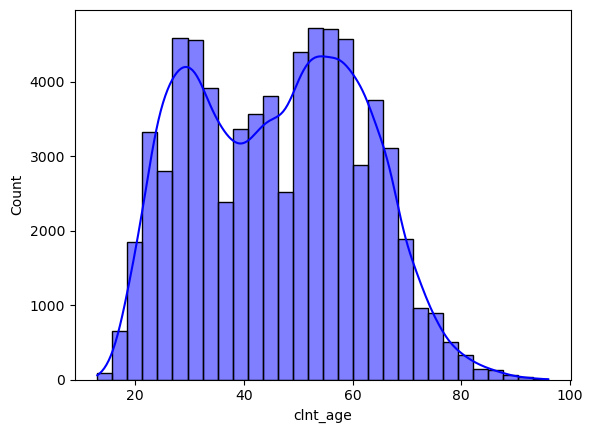

In [33]:
sns.histplot(demo['clnt_age'], kde=True, bins=30, color="blue")
plt.show()

Grafica antiguedad clientes

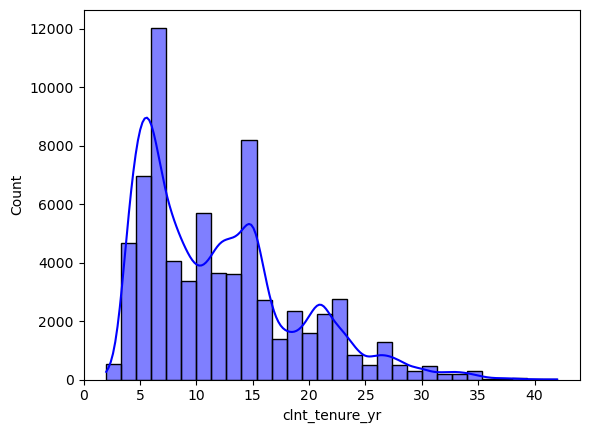

In [34]:
sns.histplot(demo['clnt_tenure_yr'], kde=True, bins=30, color="blue")
plt.show()

In [35]:
bins = [0, 50000, 100000, 200000, 300000, 500000, demo_copia['bal'].max()]
labels = ['-50k','-100k','-200k','-300k','-500k','+500k']
demo_copia['bal'] = pd.cut(demo_copia['bal'], bins=bins, labels=labels, include_lowest=True)

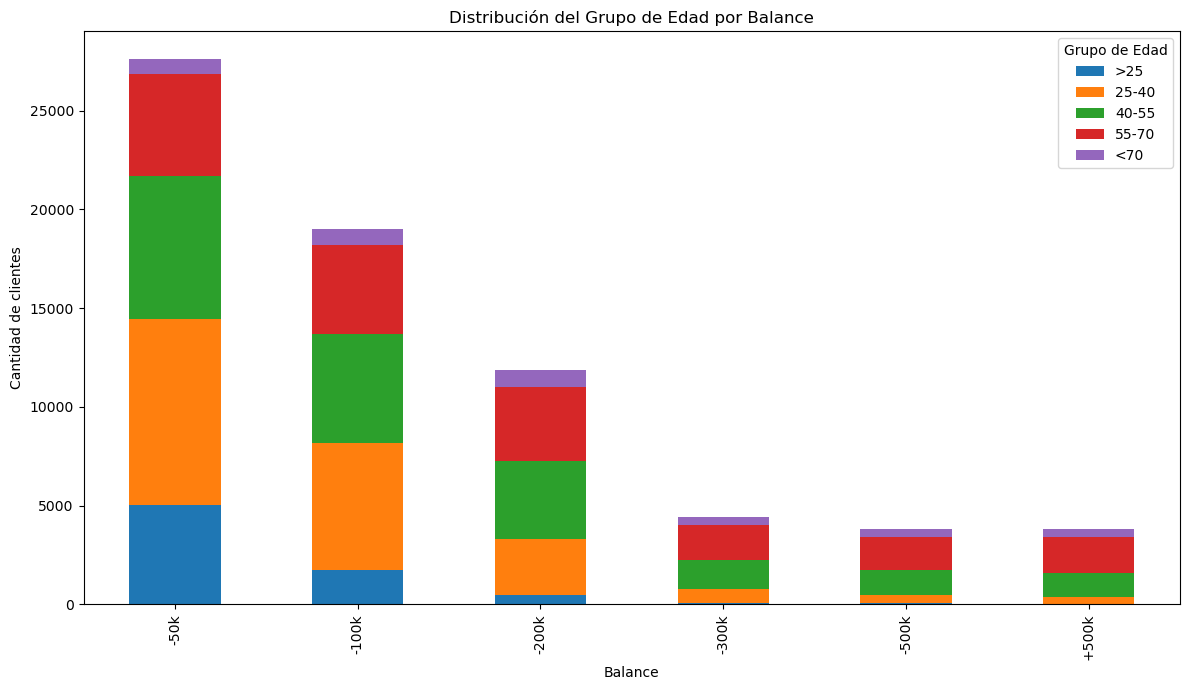

In [36]:
tabla = pd.crosstab(demo_copia['bal'], demo_copia['clnt_age'])

# Gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, figsize=(12,7))
plt.xlabel('Balance')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución del Grupo de Edad por Balance')
plt.legend(title='Grupo de Edad')
plt.tight_layout()
plt.show()

PORCENTAGE DE FINALIZACIÓN DE LOS CLIENTES

In [37]:
# Aseguramos que las fechas estén en formato datetime
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])
# Elegimos el último paso del funnel (puedes cambiar si es otro)
last_step = 'confirm'
# Agrupamos por visita y verificamos si alcanzó el último paso
completion = df_merged.groupby('visit_id')['process_step'].apply(lambda steps: last_step in steps.values)
completion_rate = completion.mean() * 100
print(f"Completion Rate: {completion_rate:.2f}%")

Completion Rate: 54.45%


PORCENTAGE DE FINALIZACIÓN DE LSO CLIENTES PARA TEST Y CONTROL

In [38]:
# Aseguramos que date_time esté en formato datetime
df_merged['date_time'] = pd.to_datetime(df_merged['date_time'])
# Paso final del proceso
last_step = 'confirm'
# Verificamos si cada visita llegó a 'confirm', separado por Variation
completion = df_merged.groupby(['Variation', 'visit_id'])['process_step'] \
    .apply(lambda steps: last_step in steps.values).reset_index(name='completed')
# Calculamos la tasa por grupo
completion_rate_control = completion[completion['Variation'] == 'Control']['completed'].mean() * 100
completion_rate_test = completion[completion['Variation'] == 'Test']['completed'].mean() * 100
# Mostrar resultados
print(f"Completion Rate (Control): {completion_rate_control:.2f}%")
print(f"Completion Rate (Test):    {completion_rate_test:.2f}%")

Completion Rate (Control): 49.85%
Completion Rate (Test):    58.52%


HIPOTESIS DE FINALIZACIÓN

H0 Completion Rate (Control) = Completion Rate (Test)

H1 Completion Rate (Control) != Completion Rate (Test)

ALPHA = 0,05

In [39]:
# Contar visitas únicas por grupo
total_visits_control = completion[completion['Variation'] == 'Control']['visit_id'].nunique()
total_visits_test = completion[completion['Variation'] == 'Test']['visit_id'].nunique()
# Contar visitas que completaron (confirm) por grupo
confirmations_control = completion[(completion['Variation'] == 'Control') & (completion['completed'])]['visit_id'].nunique()
confirmations_test = completion[(completion['Variation'] == 'Test') & (completion['completed'])]['visit_id'].nunique()
# Preparar datos para el test Z
x = [confirmations_control, confirmations_test]  # éxitos
n = [total_visits_control, total_visits_test]    # totales
# Aplicar test Z de dos colas (two-sided)
z_stat, p_value = proportions_ztest(x, n, alternative='two-sided')
# Mostrar resultados
print(f"Z-statistic: {z_stat:.3f}")
print(f"P-value: {p_value:.6f}")

Z-statistic: -22.857
P-value: 0.000000


P-value ≈ 0.000000
Rechazamos la hipótesis nula. Hay evidencia muy fuerte de que el grupo Test tiene una tasa de finalización diferente (y mayor) que el grupo Control.
Z-Test valor mide cuántas desviaciones estándar hay entre las dos tasas.
 Z = -22.857 significa que la diferencia entre tasas es extremadamente grande y a favor del grupo Test.

Vamos a ver el tiempo entre pasos

CREAMOS 4 COLUMNAS CON LOS TIEMPOS ENTRE PASOS, CREAMOS COLUMAS PARA VER LOS TIEMPOS Y LOS ERRORES EN CASO DE QUE VUELVAN HACIA ATRAS Y SE PASEN MAS DE 6 MINUTOS

In [40]:
for step in range(4):
    df_reducido[f'step_{step}_to_{step+1}'] = np.nan

# Ordenar temporalmente por cliente + visita
df_reducido = df_reducido.sort_values(['client_id', 'visit_id', 'date_time']).copy()

# Procesar cada cliente y visita por separado
for (client, visit), group in df_reducido.groupby(['client_id', 'visit_id']):
    group = group.reset_index()
    
    for i in range(len(group) - 1):
        idx_current = group.loc[i, 'index']
        idx_next = group.loc[i + 1, 'index']
        
        step_now = group.loc[i, 'process_step']
        step_next = group.loc[i + 1, 'process_step']
        
        time_now = group.loc[i, 'date_time']
        time_next = group.loc[i + 1, 'date_time']
        
        # Verificamos si el siguiente paso es el que corresponde
        if step_next == step_now + 1:
            diff = (time_next - time_now).total_seconds()
            
            col_name = f'step_{step_now}_to_{step_next}'
            if 0 <= diff <= 360:
                df_reducido.loc[idx_current, col_name] = int(diff)
            else:
                df_reducido.loc[idx_current, col_name] = "error"
        
        # Si el paso siguiente es menor (retroceso), marcamos error en el paso actual
        elif step_next < step_now:
            if step_now < 4:
                col_name = f'step_{step_now}_to_{step_now+1}'
                df_reducido.loc[idx_current, col_name] = "error"

C:\Users\34722\AppData\Local\Temp\ipykernel_11388\1824582130.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'error' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_reducido.loc[idx_current, col_name] = "error"
C:\Users\34722\AppData\Local\Temp\ipykernel_11388\1824582130.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'error' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_reducido.loc[idx_current, col_name] = "error"
C:\Users\34722\AppData\Local\Temp\ipykernel_11388\1824582130.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'error' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_reducido.loc[i

AQUI EN CASO DE QUE SIGAN EN EL MISMO PASO Y SALGA ERROR

In [41]:
for (client, visit), group in df_reducido.groupby(['client_id', 'visit_id']):
    group = group.reset_index()
    
    for i in range(len(group) - 1):
        idx_current = group.loc[i, 'index']
        step_now = group.loc[i, 'process_step']
        step_next = group.loc[i + 1, 'process_step']
        
        if step_now == step_next and step_now < 4:
            col_name = f'step_{step_now}_to_{step_now+1}'
            df_reducido.loc[idx_current, col_name] = "error"

In [42]:
df_reducido_copia = df_reducido.copy()

In [43]:
# Lista de columnas de paso
step_cols = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

# Contar cuántas veces aparece "error" en cada columna
errores_por_paso = df_reducido_copia[step_cols].apply(lambda col: (col == 'error').sum())

# Mostrar el resultado
print("Cantidad de errores por paso:")
print(errores_por_paso)

Cantidad de errores por paso:
step_0_to_1    22462
step_1_to_2    11843
step_2_to_3     9074
step_3_to_4    12590
dtype: int64


In [44]:
# Definimos los valores numéricos según el paso
errores_dict = {
    'step_0_to_1': 1,
    'step_1_to_2': 2,
    'step_2_to_3': 3,
    'step_3_to_4': 4
}

# Inicializamos la columna 'step_error' con NaN
df_reducido['step_error'] = np.nan

# Recorremos cada columna de pasos para detectar si tiene "error"
for col, val in errores_dict.items():
    df_reducido.loc[df_reducido[col] == 'error', 'step_error'] = val
    df_reducido[col] = pd.to_numeric(df_reducido[col], errors='coerce')  # También convertimos el "error" a NaN en la misma pasada

In [45]:
# Renombrar la columna original a 'age'
df_reducido.rename(columns={'clnt_age': 'age'}, inplace=True)

# Crear la nueva columna 'clnt_age' con rangos
bins = [0, 25, 40, 55, 70, df_reducido['age'].max()]
labels = ['>25', '25-40', '40-55', '55-70', '<70']

df_reducido['clnt_age'] = pd.cut(df_reducido['age'], bins=bins, labels=labels, include_lowest=True)

In [46]:
df_reducido['step_0_to_1'] = df_reducido['step_0_to_1'].astype('Int64')
df_reducido['step_1_to_2'] = df_reducido['step_1_to_2'].astype('Int64')
df_reducido['step_2_to_3'] = df_reducido['step_2_to_3'].astype('Int64')
df_reducido['step_3_to_4'] = df_reducido['step_3_to_4'].astype('Int64')
df_reducido['step_error'] = df_reducido['step_error'].astype('object')


In [47]:
df_reducido.to_csv("Tableau2.csv")

Cantidad de errores por paso

Cantidad de errores por paso para Test y Control

In [48]:
step_cols = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

# Crear un DataFrame para guardar los conteos
errores_por_variation = {}

# Recorrer cada grupo: Test y Control
for variation in df_reducido['Variation'].unique():
    df_variation = df_reducido_copia[df_reducido_copia['Variation'] == variation]
    errores = df_variation[step_cols].apply(lambda col: (col == 'error').sum())
    errores_por_variation[variation] = errores

# Convertir a DataFrame para visualización clara
errores_df = pd.DataFrame(errores_por_variation)

print("Cantidad de errores por paso y grupo:")
print(errores_df)

Cantidad de errores por paso y grupo:
              Test  Control
step_0_to_1  12494     9968
step_1_to_2   8081     3762
step_2_to_3   5737     3337
step_3_to_4   6576     6014


HIPOTESIS Nº DE ERRORES PARA TEST Y CONTROL

H0 Test nº errores = Control nº errores

H1 Test nº errores ! = Control nº errores

alpha = 0.05

In [49]:
# Crear flags binarios: 1 si "error", 0 si no
df_flags = df_reducido_copia[step_cols].applymap(lambda x: 1 if str(x).lower() == 'error' else 0)
df_flags['Variation'] = df_reducido_copia['Variation']

# Contar errores por paso y grupo (Test y Control)
errores_por_grupo = df_flags.groupby('Variation')[step_cols].sum()

# Chi² test por paso
chi2_results = {}
for col in step_cols:
    tabla = pd.crosstab(df_flags['Variation'], df_flags[col])
    chi2_stat, p_value, _, _ = chi2_contingency(tabla)
    chi2_results[col] = {'chi2_stat': chi2_stat, 'p_value': p_value}

# Convertir a DataFrame
df_chi2_errores = pd.DataFrame(chi2_results).T

# Mostrar resultados
print("Errores por grupo:")
print(errores_por_grupo)

print("\nResultados del test Chi²:")
print(df_chi2_errores)

C:\Users\34722\AppData\Local\Temp\ipykernel_11388\115802844.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_flags = df_reducido_copia[step_cols].applymap(lambda x: 1 if str(x).lower() == 'error' else 0)


Errores por grupo:
           step_0_to_1  step_1_to_2  step_2_to_3  step_3_to_4
Variation                                                    
Control           9968         3762         3337         6014
Test             12494         8081         5737         6576

Resultados del test Chi²:
              chi2_stat        p_value
step_0_to_1    0.058743   8.084935e-01
step_1_to_2  782.516755  3.414174e-172
step_2_to_3  213.897970   1.938544e-48
step_3_to_4   63.853428   1.340289e-15


In [50]:
clientes_por_grupo = df_reducido.groupby('Variation')['client_id'].nunique()
print(clientes_por_grupo)

Variation
Control    23507
Test       26933
Name: client_id, dtype: int64


Todos los casos la H0 la rechazamos, ya que el pvalue es menor que alpha en todos los pasos.

In [51]:
max_step_per_visit = df_reducido.groupby(['client_id', 'visit_id', 'Variation'])['process_step'].max().reset_index()

# Paso 2: Calcular cuántos pasos le faltaron a cada visita para llegar al paso final (4)
max_step_per_visit['step_error'] = 4 - max_step_per_visit['process_step']

# Paso 3: Calcular el promedio de steps faltantes por grupo
error_avg_by_group = max_step_per_visit.groupby('Variation')['step_error'].mean().round(2).reset_index()

# Mostrar resultados
print("Promedio de pasos faltantes por grupo (step_error promedio):")
print(error_avg_by_group)

Promedio de pasos faltantes por grupo (step_error promedio):
  Variation  step_error
0   Control        1.49
1      Test        1.10


In [52]:
last_step_by_visit = df_reducido.groupby(['client_id', 'visit_id', 'Variation'])['process_step'].max().reset_index()

# Paso 2: filtrar los que NO llegaron al paso final (4)
abandonos = last_step_by_visit[last_step_by_visit['process_step'] < 4].copy()

# Paso 3: contar cuántas visitas se quedan en cada paso, por grupo
abandono_por_paso = abandonos.groupby(['Variation', 'process_step']).size().unstack(fill_value=0)

# Paso 4: calcular el total de visitas por grupo
total_visitas = last_step_by_visit.groupby('Variation')['visit_id'].count()

# Paso 5: calcular % de abandono por paso
abandono_rate = (abandono_por_paso.div(total_visitas, axis=0) * 100).round(2)

# Mostrar resultados
print("Tasa de abandono por paso (%):")
print(abandono_rate)

Tasa de abandono por paso (%):
process_step      0      1     2      3
Variation                              
Control       23.49  10.84  6.33   9.45
Test          13.66  10.50  6.91  10.35


In [53]:
totales = df_reducido.groupby('Variation')[['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']] \
    .apply(lambda x: x.notna().sum())

In [54]:
error_rates = (errores / totales) * 100
error_rates = error_rates.round(2)
print("Error rate por paso y grupo (%):")
print(error_rates)

Error rate por paso y grupo (%):
           step_0_to_1  step_1_to_2  step_2_to_3  step_3_to_4
Variation                                                    
Control          39.23        16.94        15.96        42.23
Test             30.19        13.75        14.03        34.60


In [55]:
error_rates["Total"] = error_rates.mean(axis=1).round(2)

# Mostrar resultado
print("Error rate por paso y grupo (%), incluyendo total promedio:")
print(error_rates)

Error rate por paso y grupo (%), incluyendo total promedio:
           step_0_to_1  step_1_to_2  step_2_to_3  step_3_to_4  Total
Variation                                                           
Control          39.23        16.94        15.96        42.23  28.59
Test             30.19        13.75        14.03        34.60  23.14


Promedio de tiempo entre pasos para test y control

In [56]:
cols_pasos = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

for col in cols_pasos:
    df_reducido_copia[col] = pd.to_numeric(df_reducido_copia[col], errors='coerce')  # convierte "error" en NaN

# Luego, agrupar por 'Variation' y calcular la media de cada paso
promedios = df_reducido_copia.groupby('Variation')[cols_pasos].mean().round(2)

promedios

,step_0_to_1,step_1_to_2,step_2_to_3,step_3_to_4
Variation,,,,
Control,30.61,31.53,80.21,94.17
Test,25.20,34.52,79.37,75.07


Calculamos el tiempo entre pasos para rangos de edad

In [57]:
bins = [0, 25, 40, 55, 70, df_reducido_copia['clnt_age'].max()]
labels = ['>25','25-40','40-55','55-70','<70']
df_reducido_copia['clnt_age'] = pd.cut(df_reducido_copia['clnt_age'], bins=bins, labels=labels, include_lowest=True)

In [58]:
# Lista de columnas de pasos
cols_pasos = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

# Convertir a numérico (ignora errores y NaN)
for col in cols_pasos:
    df_reducido[col] = pd.to_numeric(df_reducido[col], errors='coerce')  # convierte "error" a NaN

# Calcular el promedio por grupo de edad
promedios_por_edad = df_reducido.groupby('clnt_age')[cols_pasos].mean().round(2)

# Mostrar resultado
print(promedios_por_edad)

          step_0_to_1  step_1_to_2  step_2_to_3  step_3_to_4
clnt_age                                                    
>25             20.18        22.97        79.68        61.34
25-40           22.12        24.52        83.17         62.7
40-55           26.37        32.91        95.62         83.0
55-70           33.27        41.13        67.69       109.61
<70             38.98        51.01        50.93       132.54


C:\Users\34722\AppData\Local\Temp\ipykernel_11388\2639789583.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios_por_edad = df_reducido.groupby('clnt_age')[cols_pasos].mean().round(2)


Calculamos el tiempo entre pasos para rangos de edad para Test y Control

In [59]:
cols_pasos = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

# Asegurarse de que los valores sean numéricos (ignora "error")
for col in cols_pasos:
    df_reducido[col] = pd.to_numeric(df_reducido[col], errors='coerce')

# Agrupar por edad y grupo (Test / Control)
promedios_edad_variation = df_reducido.groupby(['clnt_age', 'Variation'])[cols_pasos].mean().round(2)

# Mostrar resultado
print(promedios_edad_variation)

                    step_0_to_1  step_1_to_2  step_2_to_3  step_3_to_4
clnt_age Variation                                                    
>25      Control           21.3        17.17        77.58        70.91
         Test             19.34        27.91        81.69        53.79
25-40    Control          23.06        20.68        83.91        73.93
         Test             21.39        27.81        82.51        53.88
40-55    Control          29.41         32.7        95.68        92.62
         Test             24.06        33.09        95.57        74.89
55-70    Control          37.76        41.84        68.09       119.77
         Test             29.82        40.58        67.36       101.04
<70      Control          45.97        52.24        51.25       140.51
         Test              33.1        50.19        50.69       125.88


C:\Users\34722\AppData\Local\Temp\ipykernel_11388\1553992245.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedios_edad_variation = df_reducido.groupby(['clnt_age', 'Variation'])[cols_pasos].mean().round(2)


Aqui intentamos averiguar porque los mayores de 55 años hacen el paso 2 al 3 mas rapido que los mas jovenes

C:\Users\34722\AppData\Local\Temp\ipykernel_11388\2108316980.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usuarios_en_2 = df_reducido[df_reducido['process_step'] == 2].groupby('clnt_age').size()
C:\Users\34722\AppData\Local\Temp\ipykernel_11388\2108316980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usuarios_en_3 = df_reducido[df_reducido['process_step'] == 3].groupby('clnt_age').size()
C:\Users\34722\AppData\Local\Temp\ipykernel_11388\2108316980.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to ret

Usuarios que llegaron al paso 2 por edad:
clnt_age
>25       4725
25-40    15066
40-55    16196
55-70    17086
<70       3534
dtype: int64

Usuarios que llegaron al paso 3 por edad:
clnt_age
>25       4051
25-40    12760
40-55    13587
55-70    14778
<70       3033
dtype: int64

Mediana de tiempo en step_2_to_3:
clnt_age  Variation
>25       Control      65.0
          Test         67.0
25-40     Control      70.0
          Test         70.0
40-55     Control      82.0
          Test         81.0
55-70     Control      49.0
          Test         49.0
<70       Control      42.0
          Test         42.0
Name: step_2_to_3, dtype: Float64


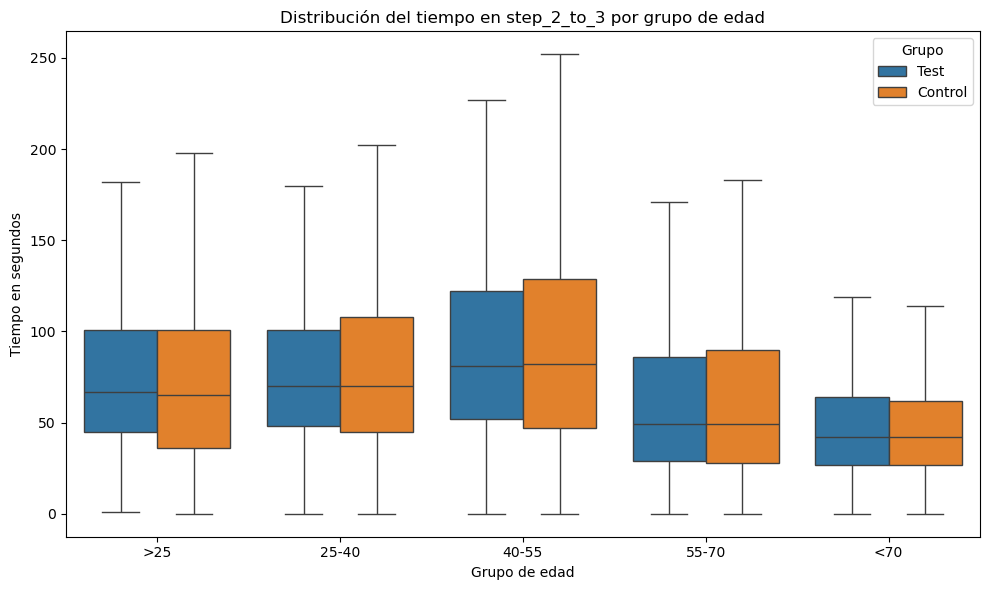

In [60]:
# 1. Cantidad de usuarios que llegaron a los pasos 2 y 3 por grupo de edad
usuarios_en_2 = df_reducido[df_reducido['process_step'] == 2].groupby('clnt_age').size()
usuarios_en_3 = df_reducido[df_reducido['process_step'] == 3].groupby('clnt_age').size()

print("Usuarios que llegaron al paso 2 por edad:")
print(usuarios_en_2)
print("\nUsuarios que llegaron al paso 3 por edad:")
print(usuarios_en_3)

# 2. Mediana del tiempo en step_2_to_3 por edad y Variation
medianas = df_reducido.groupby(['clnt_age', 'Variation'])['step_2_to_3'].median().round(2)
print("\nMediana de tiempo en step_2_to_3:")
print(medianas)

# 3. Boxplot del tiempo en step_2_to_3 por edad y grupo
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_reducido,
    x='clnt_age',
    y='step_2_to_3',
    hue='Variation',
    showfliers=False
)
plt.title('Distribución del tiempo en step_2_to_3 por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Tiempo en segundos')
plt.legend(title='Grupo')
plt.tight_layout()
plt.show()

In [61]:
df_reducido_copia.to_csv("reducido_edad.csv", index=False)

HIPOTESIS DE TIEMPO ENTRE PASOS PARA TEST Y CONTROL 

H0 AVG TIME test < AVG TIME control

H1 AVG TIME test > AVG TIME control

alpha = 0,05

In [62]:
step_cols = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']

In [63]:
for col in step_cols:
    df_reducido_copia[col] = pd.to_numeric(df_reducido_copia[col], errors='coerce')

ttest_results = {}
for col in step_cols:
    test_vals = df_reducido_copia[df_reducido_copia['Variation'] == 'Test'][col].dropna()
    control_vals = df_reducido_copia[df_reducido_copia['Variation'] == 'Control'][col].dropna()
    if len(test_vals) > 1 and len(control_vals) > 1:
        t_stat, p_val = ttest_ind(test_vals, control_vals, equal_var=False, alternative='less')
        ttest_results[col] = {'t_stat': t_stat, 'p_value': p_val}

# Convertir a DataFrame para mostrar
df_ttest = pd.DataFrame(ttest_results).T.round(4)
df_ttest

,t_stat,p_value
step_0_to_1,-15.4023,0.0000
step_1_to_2,9.0347,1.0000
step_2_to_3,-1.4461,0.0741
step_3_to_4,-23.7958,0.0000


El pvalue de 

step_0_to_1 es 0 -  Rechazamos H₀ → el tiempo es diferente entre Test y Control.

step_1_to_2	es 0 -  Rechazamos H₀ → el tiempo es diferente entre Test y Control(ES LA UNICA DONDE EL CONTROL ES MAS RAPIDO)

step_2_to_3	es 0.1481  - No rechazamos H₀ ya que el pvalue>alpha

step_3_to_4	es 0 -  Rechazamos H₀ → el tiempo es diferente entre Test y Control.

HIPOTEISI QUE TARDAN MAS SEGUN VA AVANZANDO LA EDAD

H0 CUANTO MAS MAYOR MAS TARDA ENTRE PASOS

H1 CUANTO MAS JOVEN MENOS TARDA ENYRE PASOS

In [64]:
# Asegurarse de que las columnas de pasos sean numéricas (ignora 'error')
cols_pasos = ['step_0_to_1', 'step_1_to_2', 'step_2_to_3', 'step_3_to_4']
for col in cols_pasos:
    df_reducido[col] = pd.to_numeric(df_reducido[col], errors='coerce')

# Mapear los rangos de edad a un valor numérico para correlación
edad_orden = {'>25': 1, '25-40': 2, '40-55': 3, '55-70': 4, '<70': 5}

# Calcular promedio de tiempo entre pasos por grupo de edad y Variation
df_promedios = df_reducido.groupby(['clnt_age', 'Variation'])[cols_pasos].mean().reset_index()

# Agregar columna numérica de edad
df_promedios['edad_num'] = df_promedios['clnt_age'].map(edad_orden)

# Calcular correlación Spearman para cada paso y grupo (Test / Control)
resultados_correlacion = []
for paso in cols_pasos:
    for variation in ['Test', 'Control']:
        subset = df_promedios[df_promedios['Variation'] == variation]
        corr, p_val = spearmanr(subset['edad_num'], subset[paso])
        resultados_correlacion.append({
            'Paso': paso,
            'Grupo': variation,
            'Correlación (Spearman)': round(corr, 4),
            'p_value': round(p_val, 6)
        })

# Mostrar resultados
df_resultados_edad = pd.DataFrame(resultados_correlacion)
print(df_resultados_edad)

          Paso    Grupo  Correlación (Spearman)   p_value
0  step_0_to_1     Test                     1.0  0.000000
1  step_0_to_1  Control                     1.0  0.000000
2  step_1_to_2     Test                     0.9  0.037386
3  step_1_to_2  Control                     1.0  0.000000
4  step_2_to_3     Test                    -0.6  0.284757
5  step_2_to_3  Control                    -0.6  0.284757
6  step_3_to_4     Test                     1.0  0.000000
7  step_3_to_4  Control                     1.0  0.000000


C:\Users\34722\AppData\Local\Temp\ipykernel_11388\3555421998.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_promedios = df_reducido.groupby(['clnt_age', 'Variation'])[cols_pasos].mean().reset_index()


Rechazamos la H0 en todas menos en el paso 2 al 3 que pvalue es mayor que 0,05 en test y en control asi que la H0 es correcta


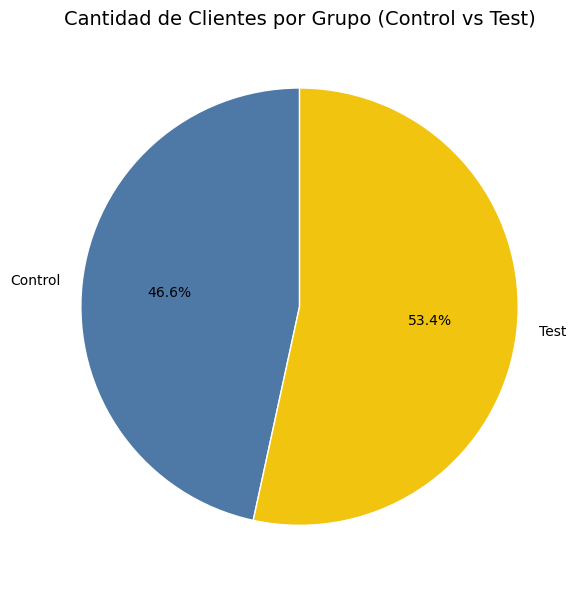

In [65]:
import matplotlib.pyplot as plt

# Datos
labels = ['Control', 'Test']
clients = [23507, 26933]
colors = ['#4e79a7', '#f1c40f']

# Crear el gráfico
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    clients,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
ax.set_title('Cantidad de Clientes por Grupo (Control vs Test)', fontsize=14)
plt.tight_layout()
plt.show()
